In [113]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [48]:
url = 'https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv'

In [49]:
df = pd.read_csv(url)

In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Fill missing ages, drop missing embarked, Name, Cabin and Ticket

[]

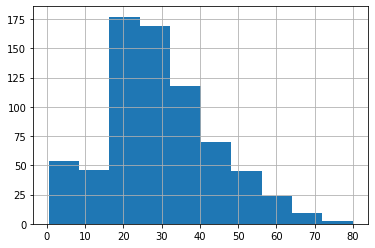

In [14]:
df["Age"].hist()
plt.plot()

In [51]:
df = df.dropna(subset=['Embarked']).drop(['Name', 'Cabin', 'Ticket', 'PassengerId'], 
                                         axis=1).reset_index(drop=True)

In [52]:
imputer = SimpleImputer(strategy='median')

In [53]:
median_ages = imputer.fit_transform(df['Age'].values.reshape(-1, 1))

In [54]:
df['Age'] = median_ages

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


In [36]:
df.Sex.value_counts().sort_values(ascending=False)

male      577
female    312
Name: Sex, dtype: int64

In [37]:
df.Pclass.value_counts().sort_values(ascending=False)

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [39]:
df.Parch.value_counts().sort_values(ascending=False)

0    676
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [45]:
df.Embarked.value_counts().sort_values(ascending=False)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [56]:
titanic = df.drop("Survived", axis=1)
titanic_labels = df['Survived'].copy()

In [ ]:
split = StratifiedShuffleSplit()

In [118]:
X_train.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [119]:
X_test.SibSp.value_counts()

0    119
1     49
2      4
3      4
5      1
8      1
Name: SibSp, dtype: int64

In [120]:
X_train.SibSp.value_counts()

0    487
1    160
2     24
4     18
3     12
8      6
5      4
Name: SibSp, dtype: int64

In [80]:
X_train, X_test, y_train, y_test = train_test_split(titanic, titanic_labels, test_size=0.2)

### Categorical Variables

In [65]:
cat_cols = [c for c, dt in zip(titanic.columns, titanic.dtypes) if dt != float]

### Numerical Variables

In [69]:
num_cols = [c for c in titanic.columns if c not in cat_cols]

In [121]:
cat_num = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols)
])


### Transform all because test data misses some categorical variables

In [133]:
titanic_enc = cat_num.fit_transform(titanic)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(titanic_enc, titanic_labels, test_size=0.2)

In [135]:
grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree']
}

knn_clf = KNeighborsClassifier()

In [136]:
grid_search = GridSearchCV(knn_clf, grid, cv=3, scoring='accuracy')

In [143]:
cross_val_score(knn_clf, X_train, y_train, cv=5, scoring='accuracy')

array([0.77622378, 0.78169014, 0.80985915, 0.78169014, 0.76056338])

In [139]:
grid_search.fit(X_train_cat.toarray(), y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [140]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7)

In [142]:
y_pred = grid_search.best_estimator_.predict(X_test.toarray())
n_correct = sum(y_pred == y_test)
print(n_correct / len(y_pred))

0.5955056179775281
